<h2>Titanic: Machine Learning From Disaster</h2>

### Description

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

### Data Dictionary

|<h3>**Variable**</h3>|<h3>**Definition**</h3>|<h3>**Key**</h3>|
|:-|:-|:-|
|PassengerId|Unique Identifier of each passenger||
|Survived|Survival|0 = No, 1 = Yes|
|Pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|Name|Name of Passenger||
|Sex|Gender||
|Age|Age in years||
|SibSp|# of siblings / spouses aboard the Titanic||
|Parch|# of parents / children aboard the Titanic||
|Ticket|Ticket number||
|Fare|Passenger fare||
|Cabin|Cabin number||
|Embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
###Loading the data
titanic_df = pd.read_csv('data.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Attributes in Data

In [5]:
print(titanic_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


#### Data types of Attributes

In [6]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### Describe the Data

In [7]:
titanic_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


**Shape of the data**

In [8]:
titanic_df.shape

(891, 12)

**Dataset Info**

In [9]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Lets do some Analysis and try to understand the dataset

### Who were the passengers on the titanic? (What age, gender, class etc)

### Distribution of gender

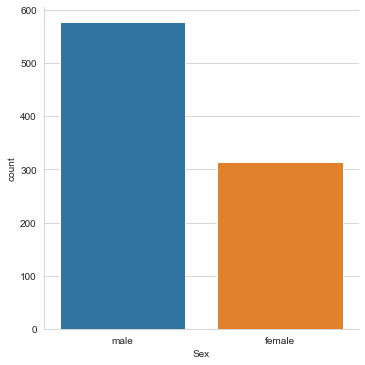

In [10]:
###Gender Plot
sns.catplot('Sex',data=titanic_df,kind='count')

### Distribution of Passenger Class

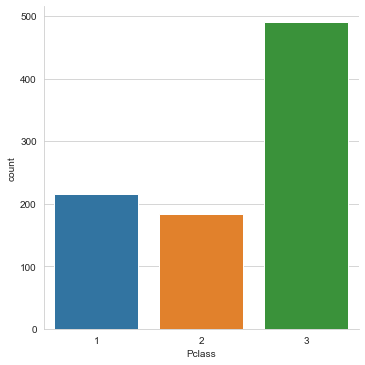

In [11]:
### Class plot
sns.catplot('Pclass',data=titanic_df,kind='count')

### Distribution of gender in each Passenger Class

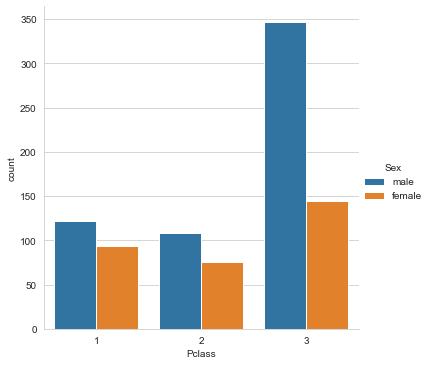

In [12]:
###Interesting! More passengers are from class Three. Now lets find the gender ration among the classes
sns.catplot('Pclass',data=titanic_df,hue='Sex',kind='count')

### Distribution of Children, Males and Females 

In [13]:
##This gives us an insight that there are quite a few males than females in 3rd class. Now lets dig deeper and find the children among the passengers.
def titanic_children(passenger):
    age , sex = passenger
    if age <16:
        return 'child'
    return sex

titanic_df['person'] = titanic_df[['Age','Sex']].apply(titanic_children,axis=1)

In [14]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


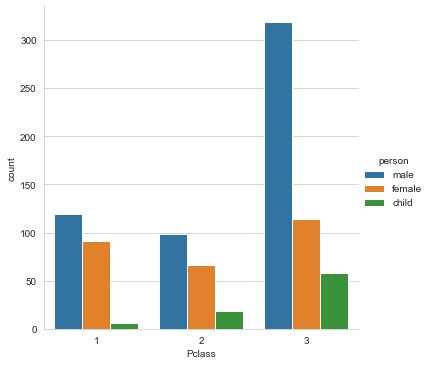

In [15]:
sns.factorplot('Pclass',data=titanic_df,hue='person',kind='count')

### Distribution of Embarked

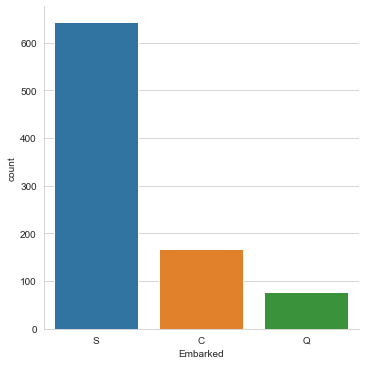

In [16]:
sns.factorplot('Embarked',data=titanic_df,kind='count')

### Distribution of Embarked wrt Pclass

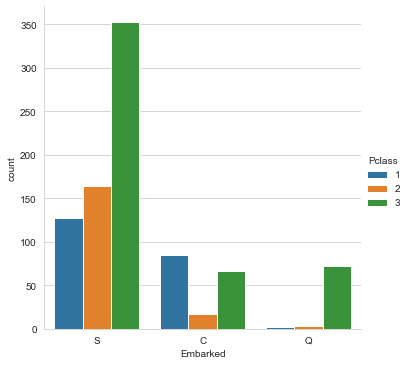

In [17]:
sns.factorplot('Embarked',data=titanic_df,hue='Pclass',kind='count')

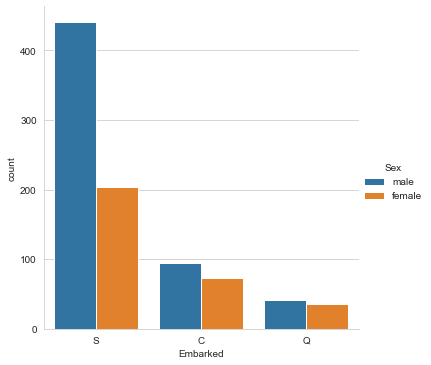

In [18]:
sns.factorplot('Embarked',data=titanic_df,hue='Sex',kind='count')

### Distribution of SibSp

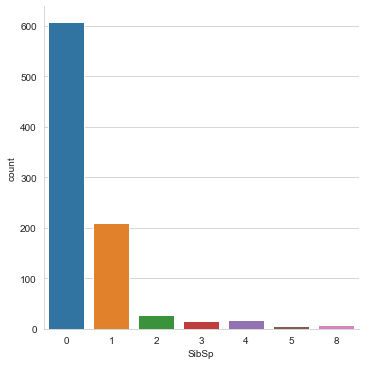

In [19]:
sns.factorplot('SibSp',data=titanic_df,kind='count')

### Distribution of SibSp in each Pclass

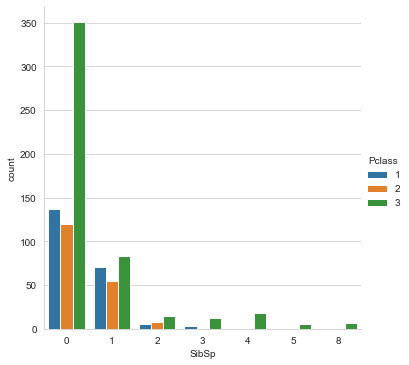

In [20]:
sns.factorplot('SibSp',data=titanic_df,hue='Pclass',kind='count')

<AxesSubplot:>

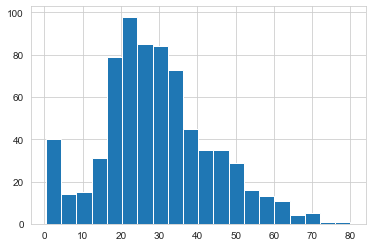

In [21]:
###Now let us look at the ages of the passengers

titanic_df['Age'].hist(bins=20)

## Now lets analyze the Distribution of Survived passangers and not survived

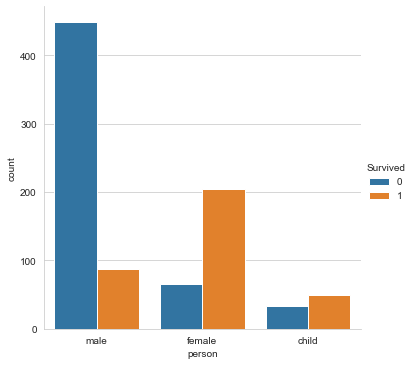

In [22]:
sns.factorplot('person',data=titanic_df,hue='Survived',kind='count')

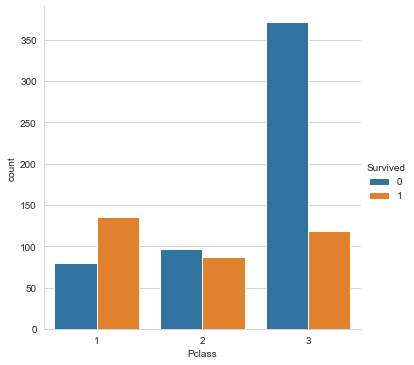

In [23]:
sns.factorplot('Pclass',data=titanic_df,hue='Survived',kind='count')

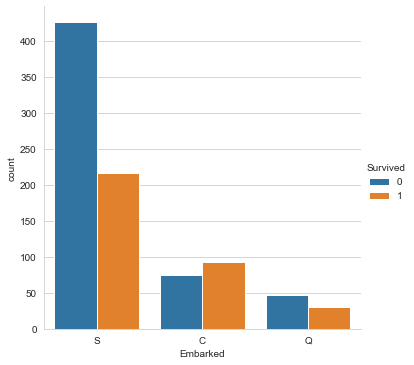

In [24]:
sns.factorplot('Embarked',data=titanic_df,hue='Survived',kind='count')

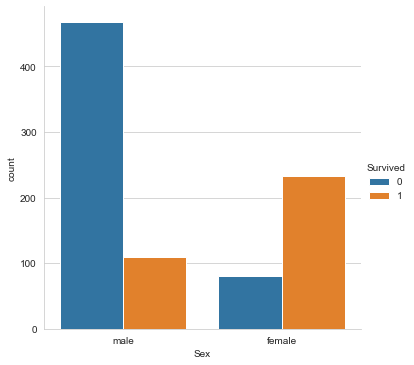

In [25]:
sns.factorplot('Sex',data=titanic_df,hue='Survived',kind='count')

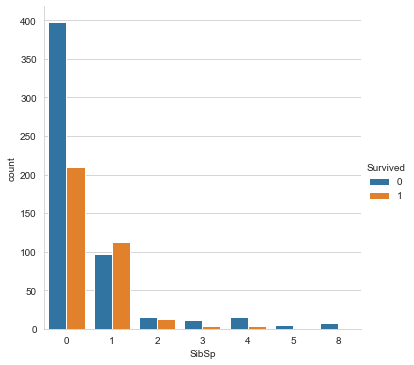

In [26]:
sns.factorplot('SibSp',data=titanic_df,hue='Survived',kind='count')

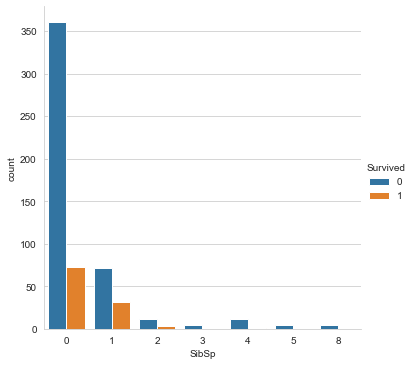

In [27]:
sns.factorplot('SibSp',data=titanic_df[titanic_df.Sex=='male'],hue='Survived',kind='count')

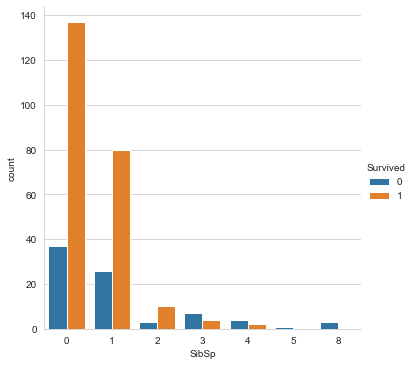

In [28]:
sns.factorplot('SibSp',data=titanic_df[titanic_df.Sex=='female'],hue='Survived',kind='count')

## Preprocessing

**Check for the duplicate rows**

In [29]:
titanic_df.duplicated().sum()

0

**Check for the null values**

In [30]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
person           0
dtype: int64

In [31]:
###Mean age of the passengers
titanic_df['Age'].mean()

29.69911764705882

In [32]:
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())

In [33]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
person           0
dtype: int64

In [34]:
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [35]:
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')

In [36]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
person           0
dtype: int64

In [37]:
titanic_df['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [38]:
titanic_df.Cabin.fillna(value="UKN", inplace=True)

### Lets drop some irrelevent attributes

In [39]:
titanic_df.drop(['PassengerId', 'Ticket' ], axis=1, inplace=True)

In [40]:
titanic_df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,person
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,UKN,S,male
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C85,C,female
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,UKN,S,female
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,C123,S,female
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,UKN,S,male
5,0,3,"Moran, Mr. James",male,29.699118,0,0,8.4583,UKN,Q,male
6,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,51.8625,E46,S,male
7,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,21.0750,UKN,S,child
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,11.1333,UKN,S,female
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,30.0708,UKN,C,child


### Do name and Cabin are irrelevent attributes?

In [41]:
titanic_df["Title"] = titanic_df.Name.str.extract("([A-Za-z]+)\.")

In [42]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,person,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,UKN,S,male,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,female,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,UKN,S,female,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,female,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,UKN,S,male,Mr


In [43]:
titanic_df['has_cabin']=1

In [44]:
titanic_df.loc[titanic_df.Cabin == "UKN",'has_cabin'] = 0

In [45]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,person,Title,has_cabin
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,UKN,S,male,Mr,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,female,Mrs,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,UKN,S,female,Miss,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,female,Mrs,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,UKN,S,male,Mr,0


In [46]:
titanic_df.drop(['Name','Cabin'],inplace=True,axis=1)

In [47]:
titanic_df['Family_Members'] = titanic_df['SibSp'] + titanic_df['Parch']

In [48]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,person,Title,has_cabin,Family_Members
0,0,3,male,22.0,1,0,7.2500,S,male,Mr,0,1
1,1,1,female,38.0,1,0,71.2833,C,female,Mrs,1,1
2,1,3,female,26.0,0,0,7.9250,S,female,Miss,0,0
3,1,1,female,35.0,1,0,53.1000,S,female,Mrs,1,1
4,0,3,male,35.0,0,0,8.0500,S,male,Mr,0,0


In [49]:
for Col in ['Sex','Embarked','person','Title']:
    Unique_entries = titanic_df[Col].unique()
    D = {}
    for i in range(len(Unique_entries)):
        D[Unique_entries[i]]=i
    print(D)

{'male': 0, 'female': 1}
{'S': 0, 'C': 1, 'Q': 2}
{'male': 0, 'female': 1, 'child': 2}
{'Mr': 0, 'Mrs': 1, 'Miss': 2, 'Master': 3, 'Don': 4, 'Rev': 5, 'Dr': 6, 'Mme': 7, 'Ms': 8, 'Major': 9, 'Lady': 10, 'Sir': 11, 'Mlle': 12, 'Col': 13, 'Capt': 14, 'Countess': 15, 'Jonkheer': 16}


In [50]:
for Col in ['Sex','Embarked','person','Title']:
    Unique_entries = titanic_df[Col].unique()
    D = {}
    for i in range(len(Unique_entries)):
        D[Unique_entries[i]]=i
    titanic_df[Col] = titanic_df[Col].map(D)

In [51]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,person,Title,has_cabin,Family_Members
0,0,3,0,22.0,1,0,7.2500,0,0,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,1,1,1,1
2,1,3,1,26.0,0,0,7.9250,0,1,2,0,0
3,1,1,1,35.0,1,0,53.1000,0,1,1,1,1
4,0,3,0,35.0,0,0,8.0500,0,0,0,0,0


### Train test split

In [52]:
X = titanic_df.drop(["Survived"], 1)
Y = titanic_df["Survived"]

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [55]:
X_train.shape

(712, 11)

In [56]:
X_test.shape

(179, 11)

### Model Training and Predictions

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
DT = DecisionTreeClassifier(max_depth=2)

In [68]:
DT.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=2)

In [69]:
Y_pred = DT.predict(X_test)

In [70]:
from sklearn.metrics import accuracy_score,precision_score,f1_score
print("Accuracy: ", accuracy_score(Y_test,Y_pred))
print("Precision: ", precision_score(Y_test,Y_pred))
print("Recall: ", f1_score(Y_test,Y_pred))


Accuracy:  0.8044692737430168
Precision:  0.7948717948717948
Recall:  0.6391752577319587


In [71]:
from sklearn import tree

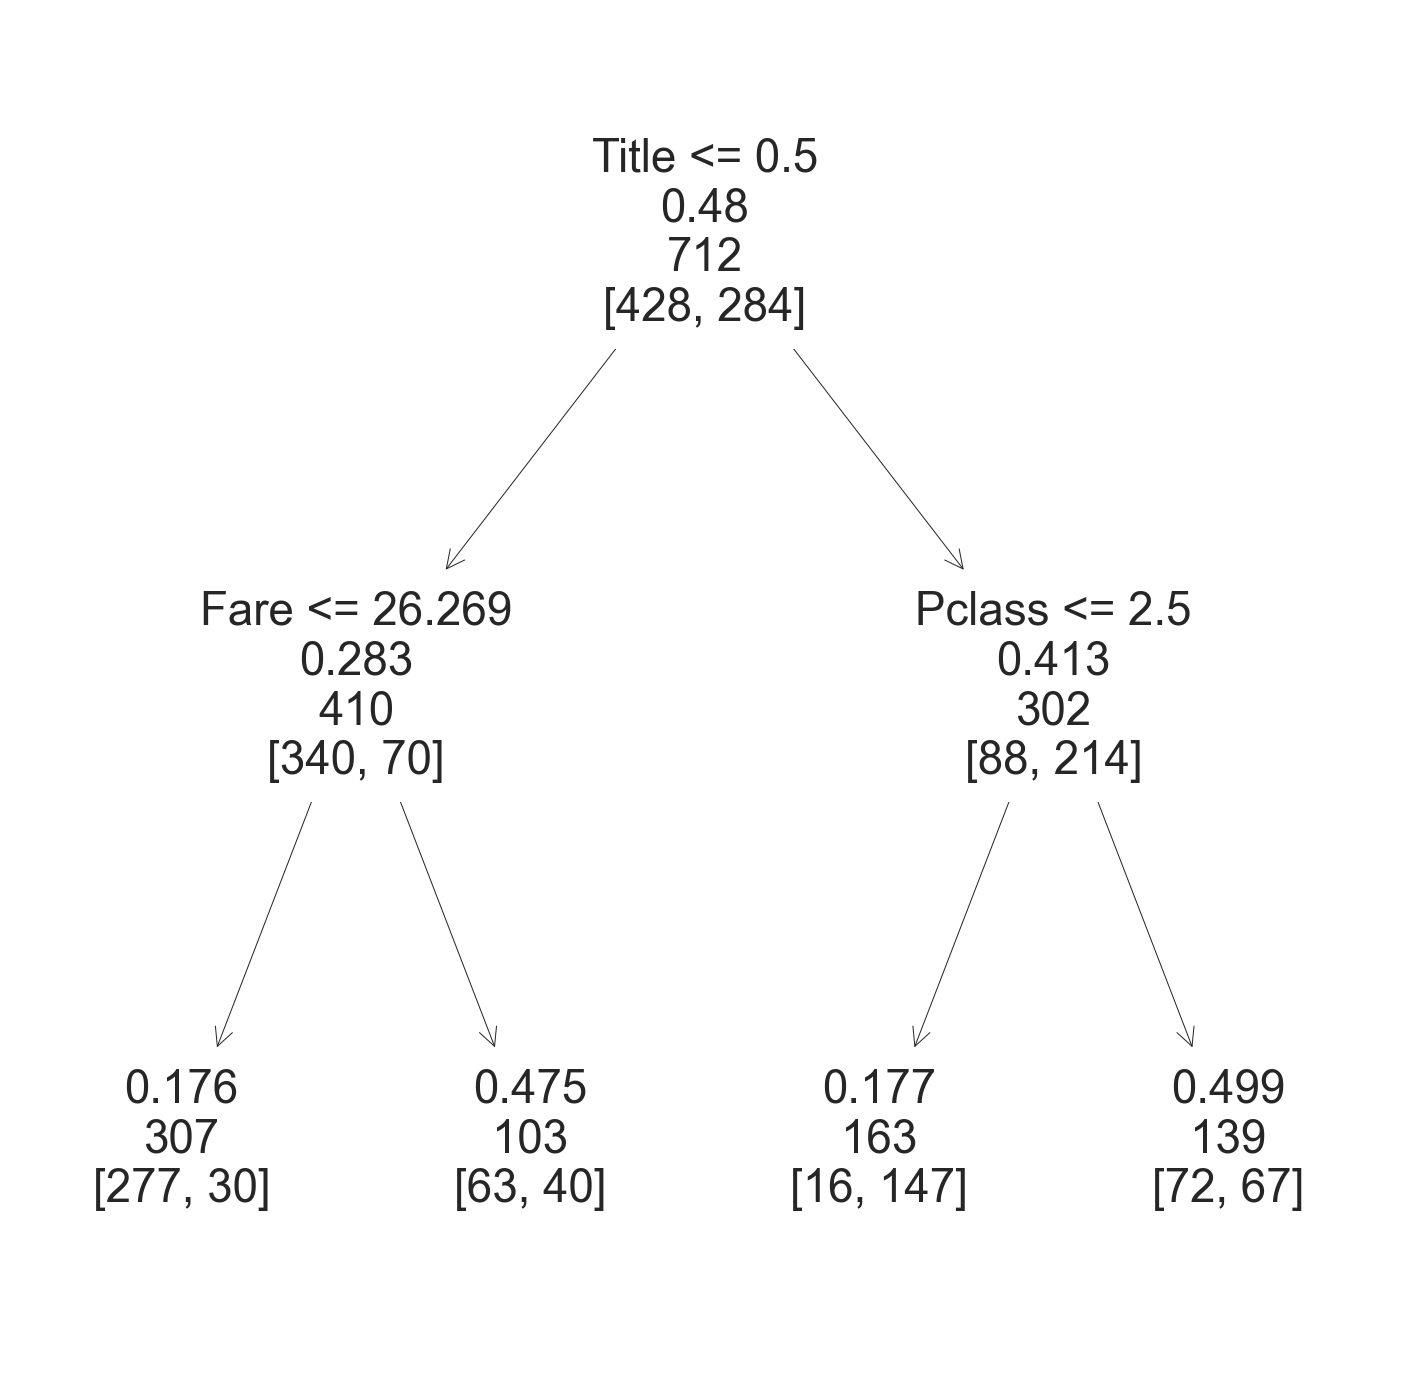

In [73]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,25))
tree.plot_tree(DT,feature_names=X.columns,label='survived')
plt.show()